In [39]:
import pandas as pd 

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados.head()

renomear = { 'expected_hours' : 'horas_esperadas', 'price' : 'preco', 'unfinished': 'nao_finalizado'}

dados = dados.rename(columns = renomear)
dados.head()

#1 não finalizado
#0 finalizado
#para não confunfir vamos trocar o valor 0 para o valor 1 para ficar do jeito padrão 

trocar = {0:1,
          1:0}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [40]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, train_test_split

#remodelando 

x = dados[['horas_esperadas','preco']]
y = dados['finalizado']



SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto') #mais livre e independente
modelo.fit(treino_x,treino_y)
previsao = modelo.predict(teste_x)

from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y,previsao)
acuracia

Treinaremos com 1617 elementos e testaremos com 540 elementos


0.5907407407407408

In [41]:
#não sei se a acuracia foi satisfatoria, então precisamos supor que os 540 testes foram finalizados
#fazer então 540 testes sejam 1 
#algoritmo de baseline
import numpy as np

previsoes_simuladas = np.ones(540)

acuracia_simulada = accuracy_score(teste_y,previsoes_simuladas)
acuracia_simulada*100


52.59259259259259

In [42]:
# x_min = teste_x.horas_esperadas.min()
# x_max = teste_x.horas_esperadas.max()

# y_min = teste_x.preco.min()
# y_max = teste_x.preco.max()

# pixels=100 

# eixo_x = np.arange(x_min,x_max, (x_max - x_min)/pixels)
# eixo_y = np.arange(y_min,y_max, (y_max - y_min)/pixels)

# #juntar os pixels
# #concatenar
# xx, yy = np.meshgrid(eixo_x, eixo_y)
# pontos = np.c_[xx.ravel(), yy.ravel()]

# z = modelo.predict(pontos)
# z = z.reshape(xx.shape)

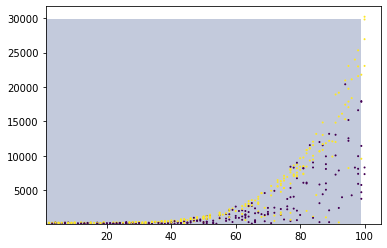

In [43]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(teste_x.horas_esperadas,teste_x.preco, c =teste_y, s=1)

#ainda não está bom porque o algoritimo é sensivel a escala
#escala de x é diferente de y

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


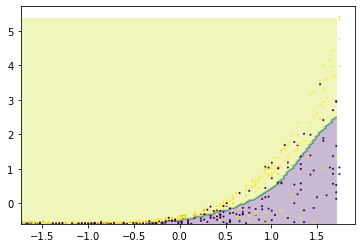

In [52]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

#resultado mais satisfatorio
